In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv("diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.isna().value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      768
Name: count, dtype: int64

In [7]:
shuffled_diabetes = diabetes.sample(frac=1)
shuffled_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
396,3,96,56,34,115,24.7,0.944,39,0
633,1,128,82,17,183,27.5,0.115,22,0
294,0,161,50,0,0,21.9,0.254,65,0
662,8,167,106,46,231,37.6,0.165,43,1
581,6,109,60,27,0,25.0,0.206,27,0
...,...,...,...,...,...,...,...,...,...
295,6,151,62,31,120,35.5,0.692,28,0
121,6,111,64,39,0,34.2,0.260,24,0
445,0,180,78,63,14,59.4,2.420,25,1
11,10,168,74,0,0,38.0,0.537,34,1


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

np.random.seed(27)

x = shuffled_diabetes.drop("Outcome",axis=1)
y = shuffled_diabetes["Outcome"]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)


model = RandomForestClassifier(n_estimators=100)
model.fit(
    x_train,
    y_train
)

RandomForestClassifier()

In [9]:
np.random.seed(27)

model.score(x_test,y_test)

0.8051948051948052

In [10]:
np.random.seed(27)

y_preds = model.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score , classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score

print(f"The accuracy of the model is {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"The Precision of the model is {precision_score(y_test,y_preds):.2f}")
print(f"The Recall of the model is {recall_score(y_test,y_preds):.2f}")
print(f"The F1 Score of the model is {f1_score(y_test,y_preds):.2f}")
print(f"The Classification report of the model is: \n\n {classification_report(y_test,y_preds)}")
print(f"The Confusion of the model is: \n\n {confusion_matrix(y_test,y_preds)}")

The accuracy of the model is 80.52%
The Precision of the model is 0.65
The Recall of the model is 0.68
The F1 Score of the model is 0.67
The Classification report of the model is: 

               precision    recall  f1-score   support

           0       0.87      0.85      0.86       110
           1       0.65      0.68      0.67        44

    accuracy                           0.81       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.81      0.81      0.81       154

The Confusion of the model is: 

 [[94 16]
 [14 30]]


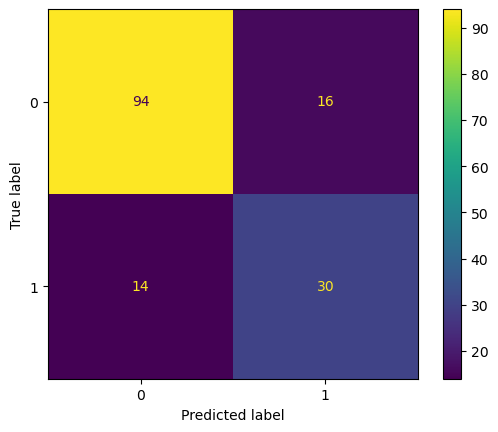

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred= y_preds);


In [13]:
def evaluate_preds(y_true: np.array, 
                   y_preds: np.array) -> None:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.

    Returns several metrics in the form of a dictionary.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    

In [14]:
# Lets create a new split of data, i.e to create train, validation and test splits
np.random.seed(27)

updated_x_train = x_train
updated_x_test = x_test
updated_y_train = y_train
updated_y_test = y_test

x_valid , x_test_new , y_valid , y_test_new = train_test_split(updated_x_test,y_test, test_size=0.5)


In [15]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(updated_x_train,updated_y_train)

RandomForestClassifier()

In [16]:
y_preds_new = clf.predict(x_valid)
evaluate_preds(y_valid,y_preds_new)

Acc: 87.01%
Precision: 0.79
Recall: 0.79
F1 score: 0.79


In [17]:
np.random.seed(27)

clf2 = RandomForestClassifier(n_estimators=200)
clf2.fit(updated_x_train,updated_y_train)
y_preds_new2 = clf2.predict(x_valid)
evaluate_preds(y_valid,y_preds_new2)

Acc: 87.01%
Precision: 0.77
Recall: 0.83
F1 score: 0.80


In [18]:
y_preds_test_new = clf2.predict(x_test_new)
evaluate_preds(y_test_new,y_preds_test_new)

Acc: 75.32%
Precision: 0.52
Recall: 0.55
F1 score: 0.54


In [20]:
np.random.seed(27)

param_grid = {"n_estimators": [200, 300, 400 , 500, 600, 700, 800, 900 ,1000],
              "max_depth": [30, 40, 50,60,70, 80 , 90, 100],
              "max_features": ["log2"],
              "min_samples_split": [2, 4, 6, 8],
              "min_samples_leaf": [4,8]}

from sklearn.model_selection import GridSearchCV

clf3 = RandomForestClassifier(n_jobs=-1)

gs_clf = GridSearchCV(estimator=clf3,
                      param_grid=param_grid,
                      cv=5, # 5-fold cross-validation
                      verbose=2)

gs_clf.fit(updated_x_train,updated_y_train)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [30, 40, 50, 60, 70, 80, 90, 100],
                         'max_features': ['log2'], 'min_samples_leaf': [4, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [200, 300, 400, 500, 600, 700, 800,
                                          900, 1000]},
             verbose=2)

In [21]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [22]:
gs_y_preds = gs_clf.predict(x_valid)
evaluate_preds(y_valid,gs_y_preds)

Acc: 85.71%
Precision: 0.78
Recall: 0.75
F1 score: 0.77


In [23]:
gs_y_preds_test = gs_clf.predict(x_test_new)
evaluate_preds(y_test_new,gs_y_preds_test)

Acc: 74.03%
Precision: 0.50
Recall: 0.50
F1 score: 0.50


In [27]:
np.random.seed(27)

from sklearn import svm

clf = svm.SVC()

clf.fit(x,y)

SVC()

In [28]:
clf.score(x_test,y_test)

0.8246753246753247

In [29]:
svc_preds = clf.predict(x_test)
svc_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [33]:
print(classification_report(y_test,svc_preds))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88       110
           1       0.77      0.55      0.64        44

    accuracy                           0.82       154
   macro avg       0.81      0.74      0.76       154
weighted avg       0.82      0.82      0.81       154



In [72]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 200,300,400,500,600,700,800,900, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'scale','auto'], 
              'kernel': ['rbf'],
              'probability' : [True]}  
  
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 91 candidates, totalling 455 fits
[CV 1/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.634 total time=   0.1s
[CV 2/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.634 total time=   0.0s
[CV 3/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.634 total time=   0.0s
[CV 4/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.634 total time=   0.0s
[CV 5/5] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.639 total time=   0.0s
[CV 1/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.634 total time=   0.1s
[CV 2/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.634 total time=   0.1s
[CV 3/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.634 total time=   0.1s
[CV 4/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.634 total time=   0.1s
[CV 5/5] END C=0.1, gamma=0.1, kernel=rbf, probability=True;, score=0.639 total time=   0.1s
[CV 1/5] END C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 200, 300, 400, 500, 600, 700,
                               800, 900, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale',
                                   'auto'],
                         'kernel': ['rbf'], 'probability': [True]},
             verbose=3)

In [73]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}

In [74]:
grid.best_estimator_

SVC(C=10, probability=True)

In [75]:
grid.predict(x_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [76]:
svc_pred_proba = grid.predict_proba(x_test)
svc_pred_proba

array([[0.85061345, 0.14938655],
       [0.66667205, 0.33332795],
       [0.59537244, 0.40462756],
       [0.70617578, 0.29382422],
       [0.33709148, 0.66290852],
       [0.69852331, 0.30147669],
       [0.83770575, 0.16229425],
       [0.51871446, 0.48128554],
       [0.79955768, 0.20044232],
       [0.09881043, 0.90118957],
       [0.38091458, 0.61908542],
       [0.91694448, 0.08305552],
       [0.84031949, 0.15968051],
       [0.8577325 , 0.1422675 ],
       [0.73297689, 0.26702311],
       [0.88845713, 0.11154287],
       [0.27843603, 0.72156397],
       [0.92594376, 0.07405624],
       [0.59303117, 0.40696883],
       [0.07843508, 0.92156492],
       [0.30067444, 0.69932556],
       [0.50773704, 0.49226296],
       [0.23640945, 0.76359055],
       [0.63537526, 0.36462474],
       [0.89921244, 0.10078756],
       [0.80668322, 0.19331678],
       [0.63147885, 0.36852115],
       [0.5       , 0.5       ],
       [0.85062511, 0.14937489],
       [0.0370861 , 0.9629139 ],
       [0.

In [78]:
grid.score(x_test,y_test)

0.7987012987012987

In [79]:
grid_preds = grid.predict(x_test)
grid_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [80]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.71      0.50      0.59        44

    accuracy                           0.80       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.79      0.80      0.79       154



In [81]:
from joblib import dump,load
best_diabetes_model = "best_diabetes_model.joblib"
dump(grid,filename=best_diabetes_model) 

['best_diabetes_model.joblib']

In [82]:
loaded_model = load(filename=best_diabetes_model)
loaded_model.score(x_test,y_test)

0.7987012987012987

In [85]:
import sklearn
sklearn.__version__

'1.2.2'